In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: D:\IPCV Projects\IM\Scripts\python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: D:\IPCV Projects\IM\Scripts\python.exe -m pip install --upgrade pip


In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [5]:
#mobile net is re-trained model for image recognition and object analysis. Its frozen model is avilable in public as a .pb # file. We have used that, as mentioned below. It required
#some additional configurations, which is provided by the pbtext file

config_file = r'D:\IPCV Projects\IM4\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = r'D:\IPCV Projects\IM4\frozen_inference_graph.pb'

model=cv2.dnn_DetectionModel(frozen_model,config_file)

# class label file has been downloaded. This is used as enumerator to make the int output 
#provided into text. # currently, mobile net works for 80 classes. Though we add new 
#classes for the label file, it will not work, hecnce the# model is not trained

classLabels=[]
file_name=r'D:\IPCV Projects\IM4\labels.txt'
with open (file_name,'rt') as fpt:
 classLabels=fpt.read().rstrip('\n').split('\n')
print(classLabels)

# some adjustments are made to the input. Then the captured input will go through these 
#adjustments. Becz, that1s how config # file is organized and , once satisfying these 
#adjusments only, the model can effectively asses the input images / videos

model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


< cv2.dnn.Model 00000235ECDE1AB0>

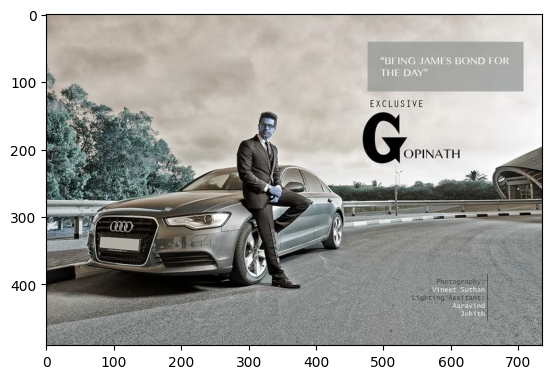

In [6]:
img=cv2.imread(r'D:\IPCV Projects\IM4\im1.jpg')
plt.imshow(img) # this is why we need pyplotlib


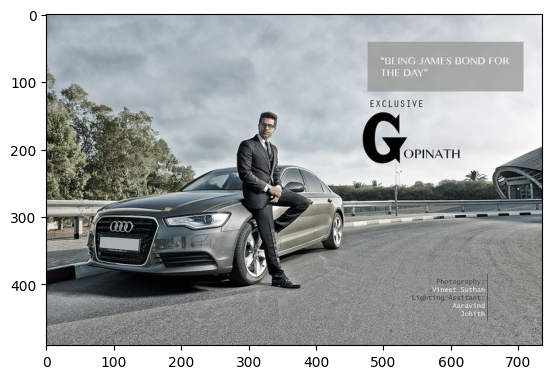

In [7]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # some color change filter

[3 1]


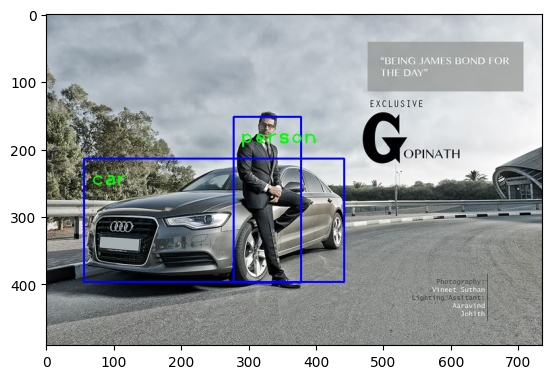

In [11]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
# if the detection confidence is more than 50% display the o/p

print(ClassIndex) # numerical predications of classes. Check with the class label list, 
#strating from 1. Then, those are  man and car
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN # bounding box text
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
# configuration of bounding box and associated text
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),
    font,fontScale=font_scale,color=(0,255,0),thickness=2)
 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))